In [1]:
import numpy as np
import pandas as pd
import joblib
import warnings
import os
import collections
from itertools import zip_longest

from scipy.optimize import curve_fit
import GPy
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

from utils import cl_curve_smooth, curve_derivative

In [2]:
test_01 = joblib.load('./test_HA/test_HA_01.lz4')
test_02 = joblib.load('./test_HA/test_HA_02.lz4')
test_03 = joblib.load('./test_HA/test_HA_03.lz4')
test_04 = joblib.load('./test_HA/test_HA_04.lz4')
test_05 = joblib.load('./test_HA/test_HA_05.lz4')

train_01 = joblib.load('./train_HA/train_HA_01.lz4')
train_02 = joblib.load('./train_HA/train_HA_02.lz4')
train_03 = joblib.load('./train_HA/train_HA_03.lz4')

In [3]:
def CL_mean_initial(df, apply_col, seg_col, up_thred = 30, down_thred= 0, show_anomaly=True):
    '''
    描述：
        统计每一段时间的某一列均值->改成中位数，更稳
    '''
    data = df[apply_col]
    seg_cl = df[seg_col].unique()
    seg_cl.sort()
    
    
    # 初始化mean_list
    mean_list = []
    for cl in seg_cl:
        seg_mean = data[df[seg_col] == cl].median()
        mean_list.append(seg_mean)
    if show_anomaly:
        for i in range(len(mean_list)):
            idx_mean = mean_list[i]
            if (idx_mean>up_thred) or (idx_mean<down_thred):
                mean_list[i] = -1
    return seg_cl, mean_list



## 提取每一段时间的中位数

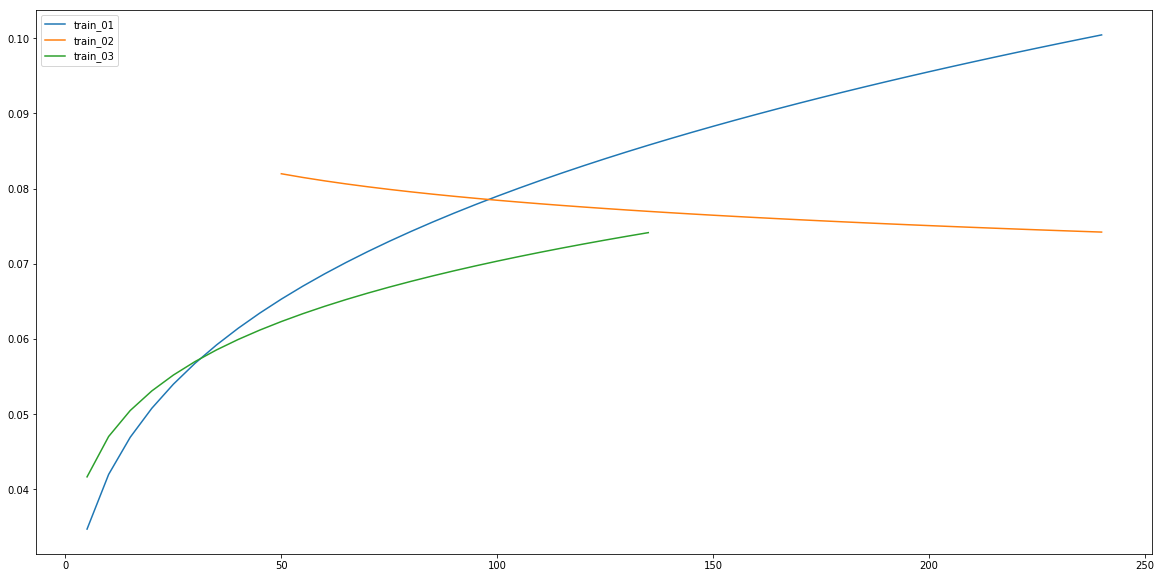

In [4]:
# train_02的曲线走势与其他曲线相比，较为异常
# 考虑只用train_01和train_03进行训练
plt.figure(figsize=(20,10))
cl, mean_list = CL_mean_initial(train_01, 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
mean_list = pd.Series(mean_list).rolling(window=4, center=False, min_periods=1).mean().tolist()
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, mean_list, label='train_01')

# # CLI>45
cl, mean_list = CL_mean_initial(train_02[train_02['CLI']>45], 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
mean_list = pd.Series(mean_list).rolling(window=4, center=False, min_periods=1).mean().tolist()
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, mean_list, label='train_02')

# CLI<140
cl, mean_list = CL_mean_initial(train_03[train_03['CLI']<140], 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
mean_list = pd.Series(mean_list).rolling(window=4, center=False, min_periods=1).mean().tolist()
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, mean_list, label='train_03')
plt.legend()

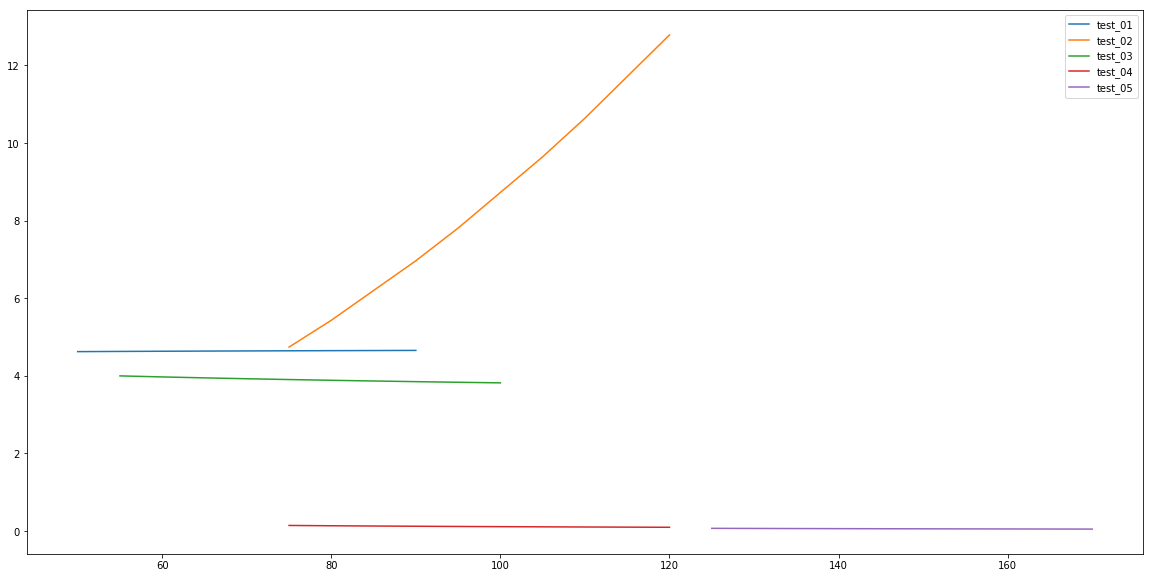

In [5]:
plt.figure(figsize=(20,10))
cl, mean_list = CL_mean_initial(test_01, 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, mean_list, label='test_01')

cl, mean_list = CL_mean_initial(test_02, 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=15, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, mean_list, label='test_02')

cl, mean_list = CL_mean_initial(test_03, 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, mean_list, label='test_03')

cl, mean_list = CL_mean_initial(test_04, 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, mean_list, label='test_04')

cl, mean_list = CL_mean_initial(test_05, 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, mean_list, label='test_05')
plt.legend()

## 求均值的1阶导数

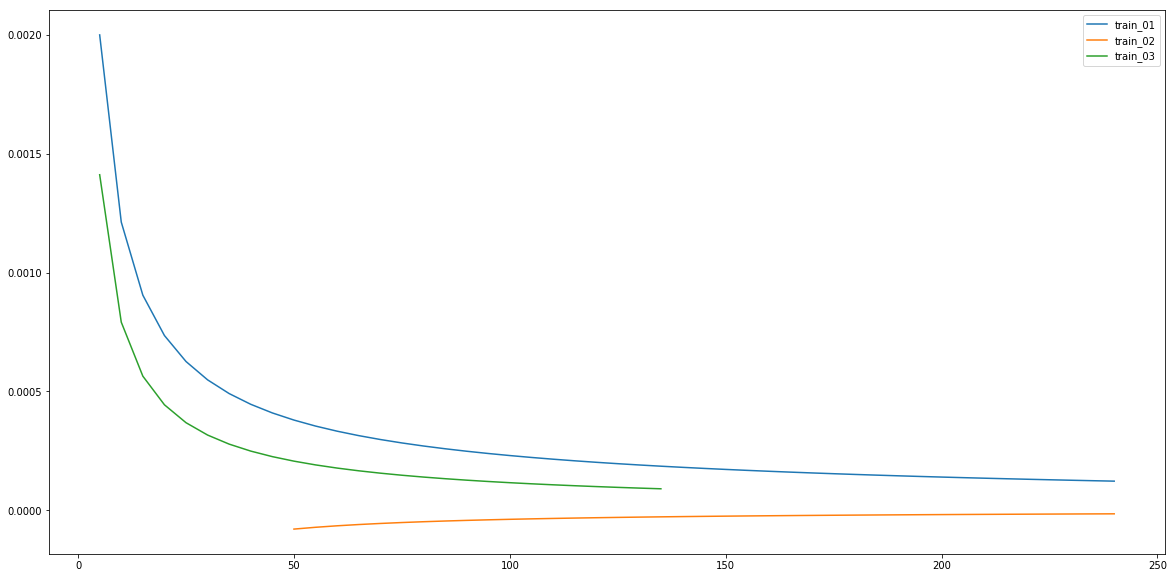

In [6]:
plt.figure(figsize=(20,10))
cl, mean_list = CL_mean_initial(train_01, 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, mean_list, fit_func = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func, cl, 1)
plt.plot(cl, diff_list, label='train_01')

cl, mean_list = CL_mean_initial(train_02[train_02['CLI']>45], 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, mean_list, fit_func = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func, cl, 1)
plt.plot(cl, diff_list, label='train_02')

cl, mean_list = CL_mean_initial(train_03[train_03['CLI']<140], 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, mean_list, fit_func = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func, cl, 1)
plt.plot(cl, diff_list, label='train_03')
plt.legend()

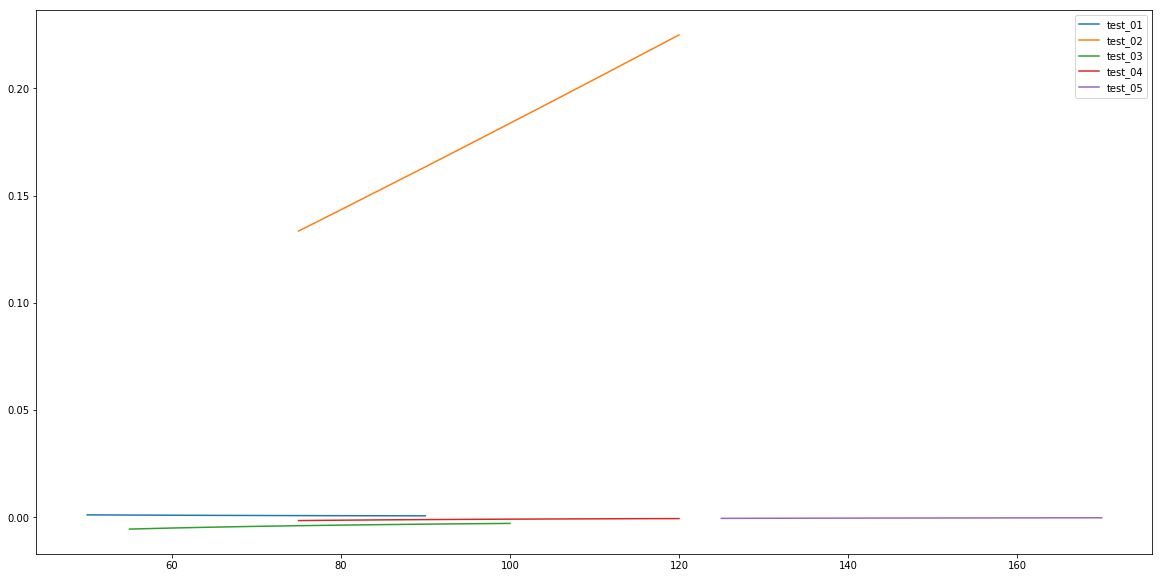

In [7]:
plt.figure(figsize=(20,10))
cl, mean_list = CL_mean_initial(test_01, 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, mean_list, fit_func = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func, cl, 1)
plt.plot(cl, diff_list, label='test_01')

cl, mean_list = CL_mean_initial(test_02, 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, mean_list, fit_func = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func, cl, 1)
plt.plot(cl, diff_list, label='test_02')

cl, mean_list = CL_mean_initial(test_03, 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, mean_list, fit_func = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func, cl, 1)
plt.plot(cl, diff_list, label='test_03')

cl, mean_list = CL_mean_initial(test_04, 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, mean_list, fit_func = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func, cl, 1)
plt.plot(cl, diff_list, label='test_04')

cl, mean_list = CL_mean_initial(test_05, 'PCA_T2', 'CLI', 30, 0, show_anomaly=False)
cl, mean_list, _ = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, mean_list, fit_func = cl_curve_smooth(mean_list, cl, up_thred=30, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func, cl, 1)
plt.plot(cl, diff_list, label='test_05')
plt.legend()